https://www.kaggle.com/competitions/rossmann-store-sales

# 0.0 Imports

In [117]:
import math
import numpy as np
import pandas as pd
import inflection

import seaborn as sns

from matplotlib import pyplot as plt
from IPython.core.display import HTML

In [118]:
def notebook_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

notebook_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 0.1 Helper Functions

### 0.2 Loading data

In [ ]:
df_sales_raw = pd.read_csv("train.csv", low_memory=False)
df_store_raw = pd.read_csv("store.csv", low_memory=False)

df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

In [ ]:
df = df_raw.copy()

# 1.0 Descrição dos Dados

### 1.1 Rename Columns

In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales',
            'Customers', 'Open', 'Promo', 'StateHoliday',
            'SchoolHoliday', 'StoreType', 'Assortment',
            'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
            'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

df.columns = cols_new

In [ ]:
df.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

### 1.2 Data Dimensions

In [ ]:
print("Number of Rows: {}".format(df.shape[0]))
print("Number of Cols: {}".format(df.shape[1]))

Number of Rows: 1017209
Number of Rows: 18


### 1.3 Data Types

In [ ]:
df.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

### 1.4 Check NA

In [ ]:
df. isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

### 1.5 Fillout NA

In [ ]:
# competition_distance
df['competition_distance'] = df['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)


# competition_open_since_month
df['competition_open_since_month'] = df.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)


# competition_open_since_year
df['competition_open_since_year'] = df.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)


# promo2_since_week
df['promo2_since_week'] = df.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)


# promo2_since_year
df['promo2_since_year'] = df.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)


# promo_interval
month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec', }

df['promo_interval'].fillna(0, inplace = True)

df['month_map'] = df['date'].dt.month.map(month_map)

df['is_promo'] = df[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

In [53]:
df.sample(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map
392811,346,4,2014-07-17,7251,621,1,1,0,1,a,c,8090.0,7.0,2014.0,0,29.0,2014.0,0,Jul
745968,819,7,2013-09-01,0,0,0,0,0,0,a,c,720.0,10.0,2014.0,0,35.0,2013.0,0,Sep
997197,58,5,2013-01-18,4082,394,1,0,0,0,a,c,7340.0,5.0,2008.0,1,27.0,2012.0,"Jan,Apr,Jul,Oct",Jan
838761,1067,1,2013-06-10,4392,383,1,0,0,0,d,c,12020.0,7.0,2009.0,0,24.0,2013.0,0,Jun
96034,145,3,2015-05-06,8502,1108,1,1,0,0,a,a,280.0,5.0,2015.0,1,45.0,2009.0,"Feb,May,Aug,Nov",May


In [70]:
df.sample(5).T

,833758,212809,1008572,868985,269923
store,524,960,283,71,979
day_of_week,5,4,2,1,3
date,2013-06-14 00:00:00,2015-01-22 00:00:00,2013-01-08 00:00:00,2013-05-13 00:00:00,2014-11-26 00:00:00
sales,7513,4606,8160,12303,7395
customers,880,462,817,925,662
open,1,1,1,1,1
promo,0,0,1,1,1
state_holiday,0,0,0,0,0
school_holiday,0,0,0,0,0
store_type,a,d,a,a,a


### 1.6 Change Types

In [ ]:
df.dtypes

In [74]:
df['competition_open_since_month'] = df['competition_open_since_month'].astype(int)
df['competition_open_since_year'] = df['competition_open_since_year'].astype(int)

df['promo_since_week'] = df['promo2_since_week'].astype(int)
df['promo_since_year'] = df['promo2_since_year'].astype(int)

### 1.7 Descriptive Statiscal

In [94]:
num_attributes = df.select_dtypes(include=['int64', 'float64'])
cat_attributes = df.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

#### 1.7.1 Numerical Attributes

In [82]:
# Central Tendency - mena, median
ct_mean = pd.DataFrame(num_attibutes.apply(np.mean)).T
ct_median = pd.DataFrame(num_attibutes.apply(np.median)).T

# Dispersion - std, min, man, range, skew, kurtosis
dispersion_std = pd.DataFrame(num_attibutes.apply(np.std)).T
dispersion_min = pd.DataFrame(num_attibutes.apply(min)).T
dispersion_max = pd.DataFrame(num_attibutes.apply(max)).T
dispersion_range = pd.DataFrame(num_attibutes.apply(lambda x: x.max() - x.min())).T
dispersion_skew = pd.DataFrame(num_attibutes.apply(lambda x: x.skew())).T
dispersion_kurtosis = pd.DataFrame(num_attibutes.apply(lambda x: x.kurtosis())).T

m = pd.concat([dispersion_min, dispersion_max, dispersion_range, ct_mean, ct_median, dispersion_std, dispersion_skew, dispersion_kurtosis]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']


In [83]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,promo2,0.0,1.0,1.0,0.500564,1.0,0.500000,-0.002255,-1.999999
9,promo2_since_week,1.0,52.0,51.0,23.619033,22.0,14.310057,0.178723,-1.184046


C:\Users\Daniel Baesso\AppData\Local\Temp\ipykernel_18676\1466740702.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sales'])


<Axes: xlabel='sales', ylabel='Density'>

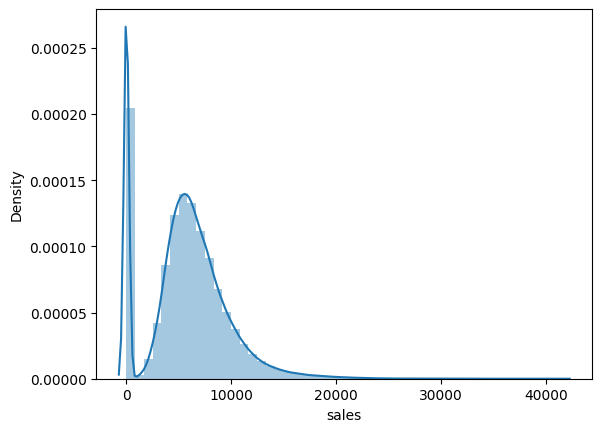

In [91]:
sns.distplot(df['sales'])

### 1.7.2. Categorical Attributes

In [97]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday                    4
store_type                       4
assortment                       3
competition_open_since_month    12
competition_open_since_year     23
promo_interval                   4
month_map                       12
promo_since_week                52
promo_since_year                 7
dtype: int64

<Axes: xlabel='assortment', ylabel='sales'>

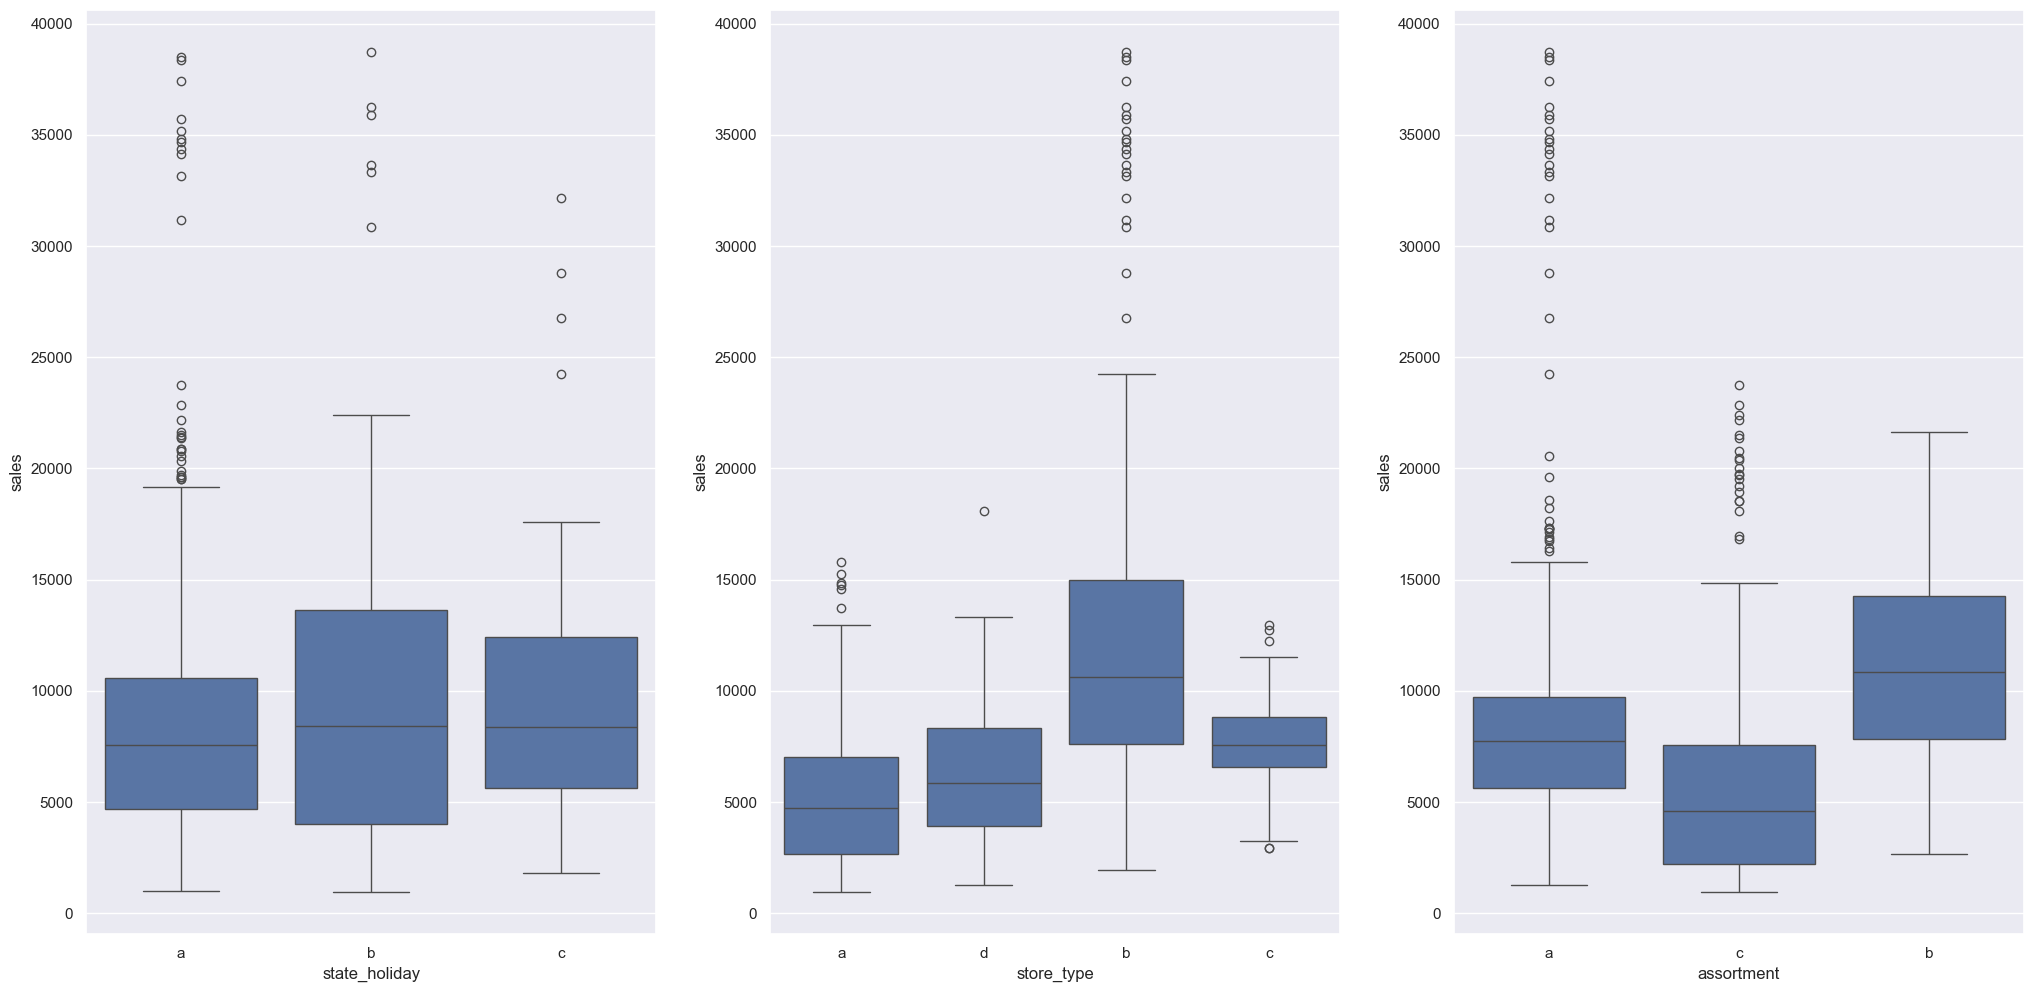

In [119]:
aux = df[(df['state_holiday'] != '0') & (df['sales'] > 0)]

plt.subplot(1,3,1)
sns.boxplot(x='state_holiday', y='sales', data=aux)

plt.subplot(1,3,2)
sns.boxplot(x='store_type', y='sales', data=aux)

plt.subplot(1,3,3)
sns.boxplot(x='assortment', y='sales', data=aux)

In [ ]:
|